In [148]:
## import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics, svm
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score, f1_score
import warnings
import keras

## neural network library
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import Input
from mlxtend.plotting import plot_confusion_matrix
import pickle           
import joblib

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Import necessary libraries from scikit-learn
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier  

In [149]:
# ignore all DeprecationWarnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [150]:
# Loading the dataset
dataset = pd.read_csv('fraud_detection.csv')
dataset.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1048575.0
mean,2.696617e+01,1.586670e+05,8.740095e+05,8.938089e+05,9.781600e+05,1.114198e+06,1.089097e-03,0.0
std,1.562325e+01,2.649409e+05,2.971751e+06,3.008271e+06,2.296780e+06,2.416593e+06,3.298351e-02,0.0
min,1.000000e+00,1.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
25%,1.500000e+01,1.214907e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
50%,2.000000e+01,7.634333e+04,1.600200e+04,0.000000e+00,1.263772e+05,2.182604e+05,0.000000e+00,0.0
75%,3.900000e+01,2.137619e+05,1.366420e+05,1.746000e+05,9.159235e+05,1.149808e+06,0.000000e+00,0.0
max,9.500000e+01,1.000000e+07,3.890000e+07,3.890000e+07,4.210000e+07,4.220000e+07,1.000000e+00,0.0


In [151]:
dataset.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [152]:
dataset.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
1048570,95,CASH_OUT,132557.35,C1179511630,479803.00,347245.65,C435674507,484329.37,616886.72,0,0
1048571,95,PAYMENT,9917.36,C1956161225,90545.00,80627.64,M668364942,0.00,0.00,0,0
1048572,95,PAYMENT,14140.05,C2037964975,20545.00,6404.95,M1355182933,0.00,0.00,0,0
1048573,95,PAYMENT,10020.05,C1633237354,90605.00,80584.95,M1964992463,0.00,0.00,0,0
1048574,95,PAYMENT,11450.03,C1264356443,80584.95,69134.92,M677577406,0.00,0.00,0,0


In [153]:
# Getting information from the dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 11 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   step            1048575 non-null  int64  
 1   type            1048575 non-null  object 
 2   amount          1048575 non-null  float64
 3   nameOrig        1048575 non-null  object 
 4   oldbalanceOrg   1048575 non-null  float64
 5   newbalanceOrig  1048575 non-null  float64
 6   nameDest        1048575 non-null  object 
 7   oldbalanceDest  1048575 non-null  float64
 8   newbalanceDest  1048575 non-null  float64
 9   isFraud         1048575 non-null  int64  
 10  isFlaggedFraud  1048575 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 88.0+ MB


In [154]:
#Checking for duplicate values
dataset.duplicated().sum()

np.int64(0)

In [155]:
#deleting the duplicate values 
dataset = dataset.drop_duplicates()

In [156]:
# Check for missing values before replacement
print("Missing values before replacement:")
dataset.isnull().sum()    # Yes about 234308 missing values  

# Another approach
# Check for missing values
# print(dataset.isna().sum())

Missing values before replacement:


step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [157]:
#Replacing Missing/NaN Values in case there are any
dataset = dataset.fillna(0)

In [158]:
dataset.shape   #meaning there are 1048575 rows and 11 columns 

(1048575, 11)

In [159]:
# checking if any value is NaN
dataset.isnull().values.any()    # Output says, there are Nan values 

np.False_

In [160]:
# Find rows with NaN values
rows_with_nan = dataset[dataset.isna().any(axis=1)]

# Display the rows with NaN values
print(rows_with_nan)

Empty DataFrame
Columns: [step, type, amount, nameOrig, oldbalanceOrg, newbalanceOrig, nameDest, oldbalanceDest, newbalanceDest, isFraud, isFlaggedFraud]
Index: []


In [161]:
# Replace all NaN values with zero
dataset = dataset.fillna(0)

# Verify that there are no more NaN values
print(dataset.isna().sum())

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64


In [162]:
#checking the total number of transaction type
dataset['type'].value_counts()

type
CASH_OUT    373641
PAYMENT     353873
CASH_IN     227130
TRANSFER     86753
DEBIT         7178
Name: count, dtype: int64

In [163]:
# Define the new column names
new_column_names = {
    'step': 'Time_Step',
    'type': 'Transaction_type',
    'amount': 'Transaction_amount',
    'nameOrig': 'Origin_account',
    'oldbalanceOrg': 'Origin_old_balance',
    'newbalanceOrig': 'Origin_new_balance',
    'nameDest': 'Destination_account',
    'oldbalanceDest': 'Destination_old_balance',
    'newbalanceDest':'Destination_new_balance',
    'isFraud':'Is_fraud',
    'isFlaggedFraud':'Is_flagged_fraud'
}
# Rename the columns
dataset = dataset.rename(columns=new_column_names)

#redefined column names
print("printing the dataset after renaming the columns")
dataset

printing the dataset after renaming the columns


,Time_Step,Transaction_type,Transaction_amount,Origin_account,Origin_old_balance,Origin_new_balance,Destination_account,Destination_old_balance,Destination_new_balance,Is_fraud,Is_flagged_fraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1048570,95,CASH_OUT,132557.35,C1179511630,479803.00,347245.65,C435674507,484329.37,616886.72,0,0
1048571,95,PAYMENT,9917.36,C1956161225,90545.00,80627.64,M668364942,0.00,0.00,0,0
1048572,95,PAYMENT,14140.05,C2037964975,20545.00,6404.95,M1355182933,0.00,0.00,0,0
1048573,95,PAYMENT,10020.05,C1633237354,90605.00,80584.95,M1964992463,0.00,0.00,0,0


In [164]:
# Loading the dataset after renaming columns 
dataset.describe()

,Time_Step,Transaction_amount,Origin_old_balance,Origin_new_balance,Destination_old_balance,Destination_new_balance,Is_fraud,Is_flagged_fraud
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1048575.0
mean,2.696617e+01,1.586670e+05,8.740095e+05,8.938089e+05,9.781600e+05,1.114198e+06,1.089097e-03,0.0
std,1.562325e+01,2.649409e+05,2.971751e+06,3.008271e+06,2.296780e+06,2.416593e+06,3.298351e-02,0.0
min,1.000000e+00,1.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
25%,1.500000e+01,1.214907e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
50%,2.000000e+01,7.634333e+04,1.600200e+04,0.000000e+00,1.263772e+05,2.182604e+05,0.000000e+00,0.0
75%,3.900000e+01,2.137619e+05,1.366420e+05,1.746000e+05,9.159235e+05,1.149808e+06,0.000000e+00,0.0
max,9.500000e+01,1.000000e+07,3.890000e+07,3.890000e+07,4.210000e+07,4.220000e+07,1.000000e+00,0.0


In [165]:
#counting number of fraudulent activities
dataset['Is_fraud'].value_counts()

Is_fraud
0    1047433
1       1142
Name: count, dtype: int64

In [166]:
# analysing fraud through transaction type
fraud_detect=dataset[dataset['Is_fraud']==1].groupby('Transaction_type')['Is_fraud'].sum().reset_index()
fraud_detect

,Transaction_type,Is_fraud
0,CASH_OUT,578
1,TRANSFER,564


In [167]:
dataset[(dataset['Transaction_type']=='TRANSFER') | (dataset['Transaction_type']=='PAYEMENT')]['Is_fraud'].value_counts()  

#  # filtering transactions only data thateither 'TRANSFER' or 'PAYEMENT', and then counts how many of these transactions are fraudulent or not."""

Is_fraud
0    86189
1      564
Name: count, dtype: int64

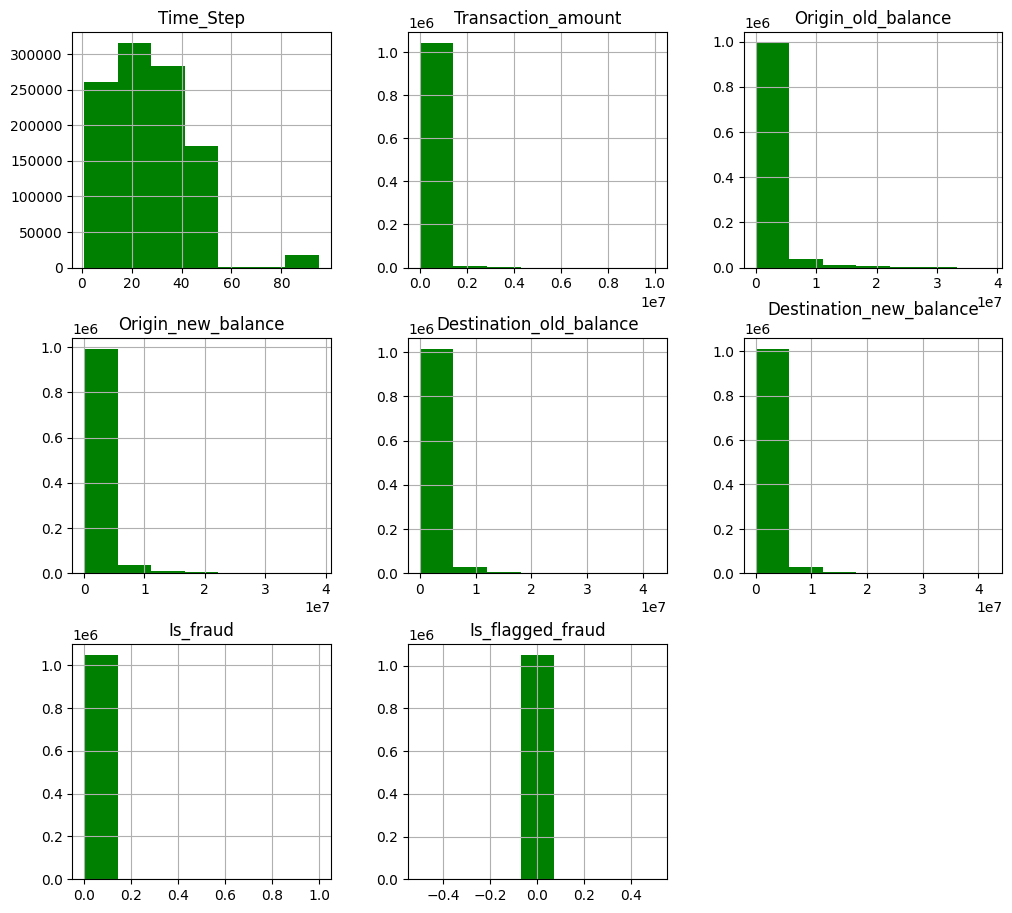

<Figure size 640x480 with 0 Axes>

In [168]:
# using the Histogram  chart checking for any outliers
dataset.hist(bins =7,figsize=(12,11),color='green')
plt.show()
plt.tight_layout()

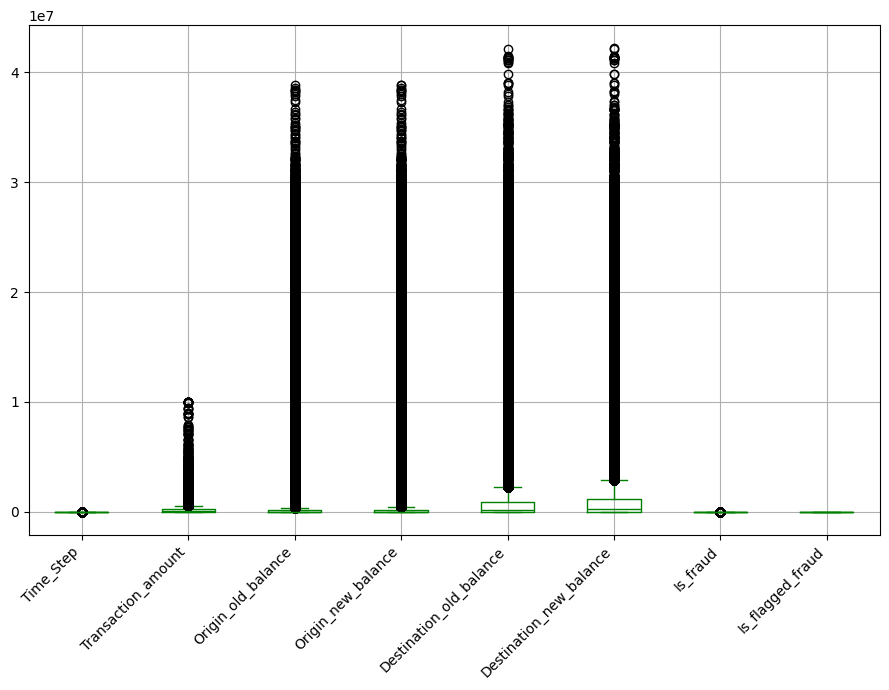

In [169]:
# using the Histogram chart checking for any outliers
dataset.boxplot(figsize=(9,7),color='green') 
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

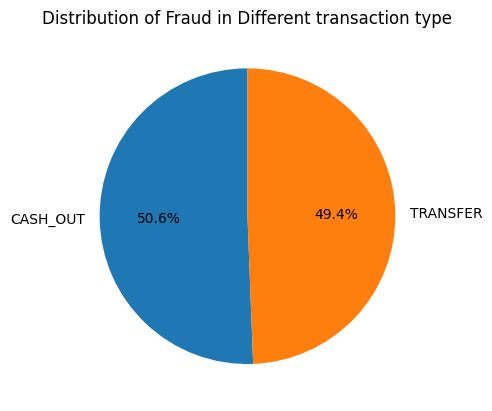

In [170]:
# Pie chart showing transfer and cash out 
plt.pie(fraud_detect['Is_fraud'],labels=fraud_detect['Transaction_type'], autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Fraud in Different transaction type')
plt.show()

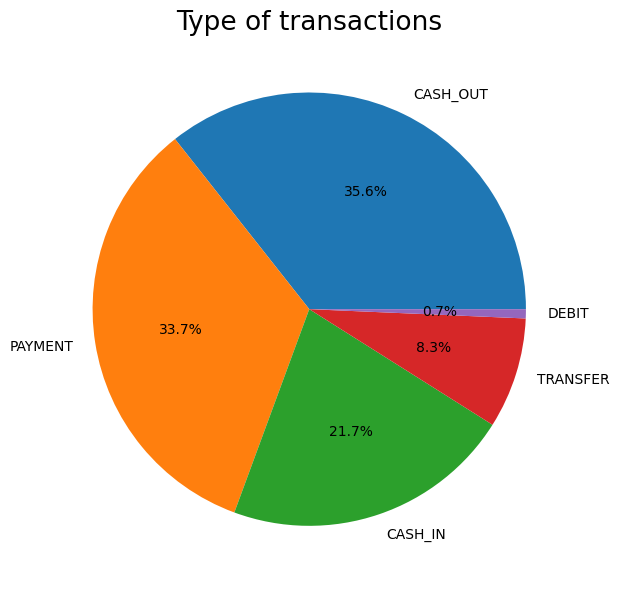

In [171]:
# Pie chart showing types of transcations
plt.figure(figsize=(8,6))
plt.pie(dataset['Transaction_type'].value_counts(),
labels=dataset['Transaction_type'].value_counts().index,autopct='%1.1f%%')
plt.title('Type of transactions', fontsize= '19')
plt.tight_layout()

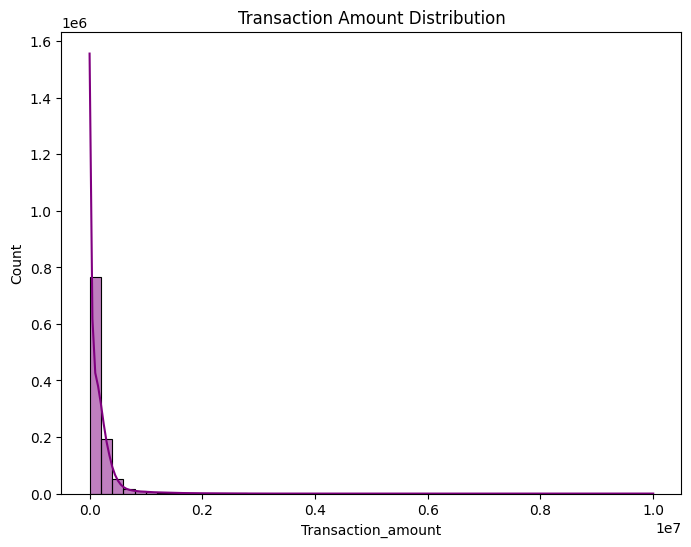

In [172]:
#Transaction Amount Distribution
plt.figure(figsize=(8, 6))
sns.histplot(dataset['Transaction_amount'], bins=50, kde=True, color='purple')
plt.title('Transaction Amount Distribution')
plt.show()

C:\Users\david\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


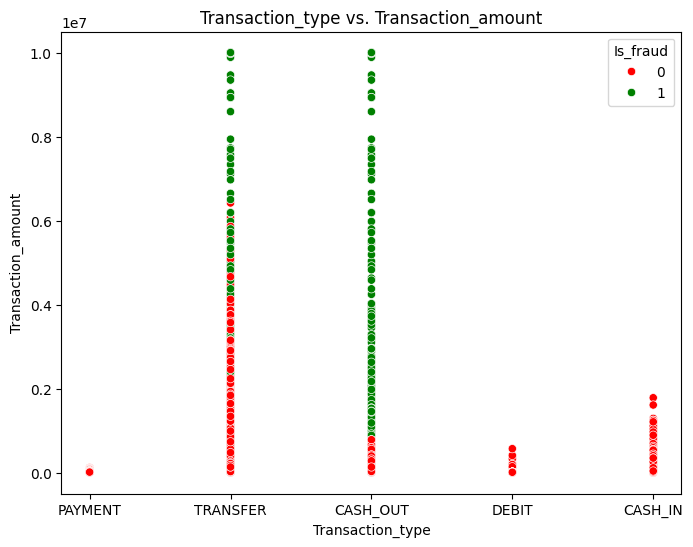

<Figure size 640x480 with 0 Axes>

In [173]:
# Scatter Plot: Fare vs. Age
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Transaction_type', y='Transaction_amount', hue='Is_fraud', data=dataset, palette={0: 'red', 1: 'green'})
plt.title('Transaction_type vs. Transaction_amount')
plt.xlabel('Transaction_type')
plt.ylabel('Transaction_amount')
plt.legend(title='Is_fraud')
plt.show()
plt.tight_layout()

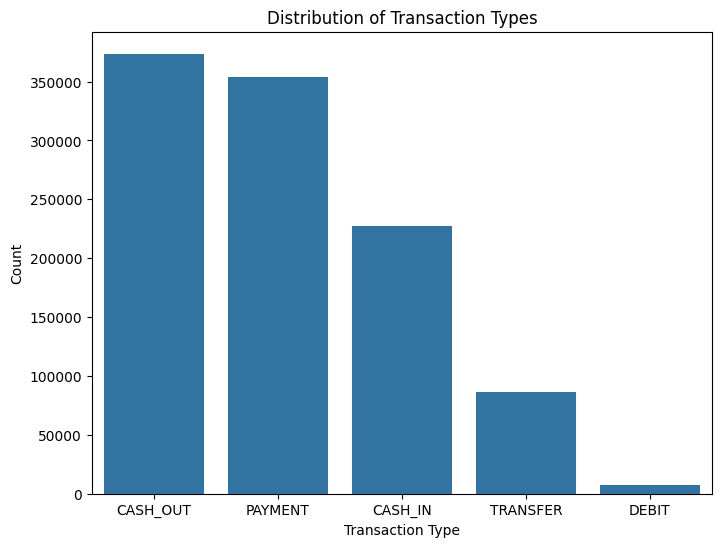

<Figure size 640x480 with 0 Axes>

In [174]:
# Count the occurrences of each transaction type
transaction_counts = dataset['Transaction_type'].value_counts()

# Plot
plt.figure(figsize=(8, 6))
sns.barplot(x=transaction_counts.index, y=transaction_counts.values)
plt.title('Distribution of Transaction Types')
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.show()
plt.tight_layout()

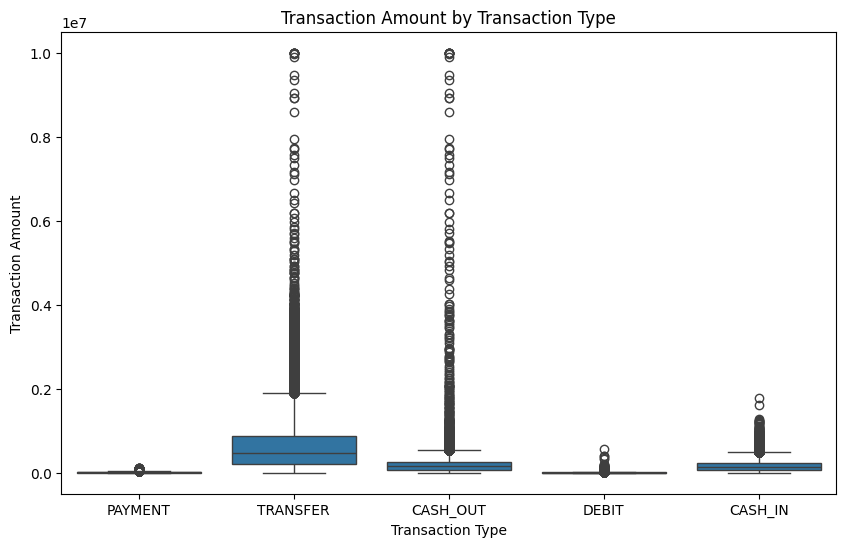

<Figure size 640x480 with 0 Axes>

In [175]:
#Transaction Amount by Transaction Type using boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Transaction_type', y='Transaction_amount', data=dataset)
plt.title('Transaction Amount by Transaction Type')
plt.xlabel('Transaction Type')
plt.ylabel('Transaction Amount')
plt.show()
plt.tight_layout()

C:\Users\david\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


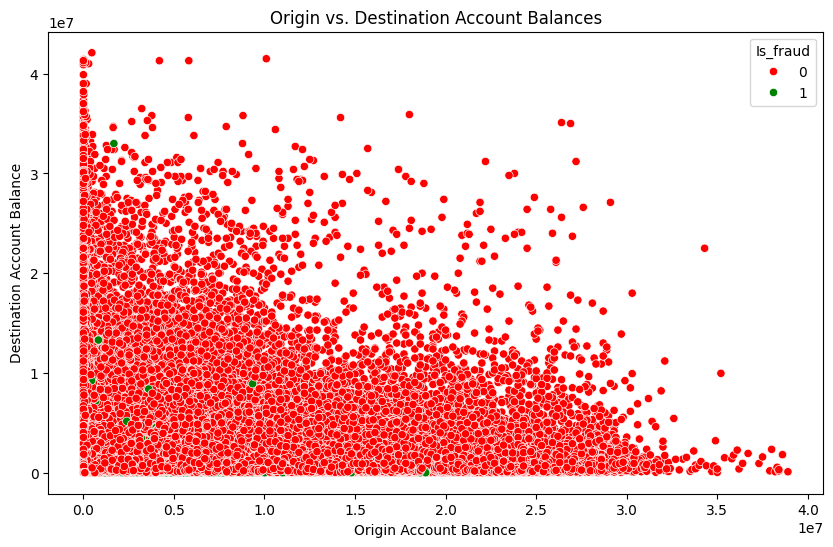

<Figure size 640x480 with 0 Axes>

In [176]:
#'Origin vs. Destination Account Balances vs origin using scatter plot 
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Origin_old_balance', y='Destination_old_balance',  hue='Is_fraud', data=dataset,palette={0: 'red', 1: 'green'})
plt.title('Origin vs. Destination Account Balances')
plt.xlabel('Origin Account Balance')
plt.ylabel('Destination Account Balance')
plt.show()
plt.tight_layout()

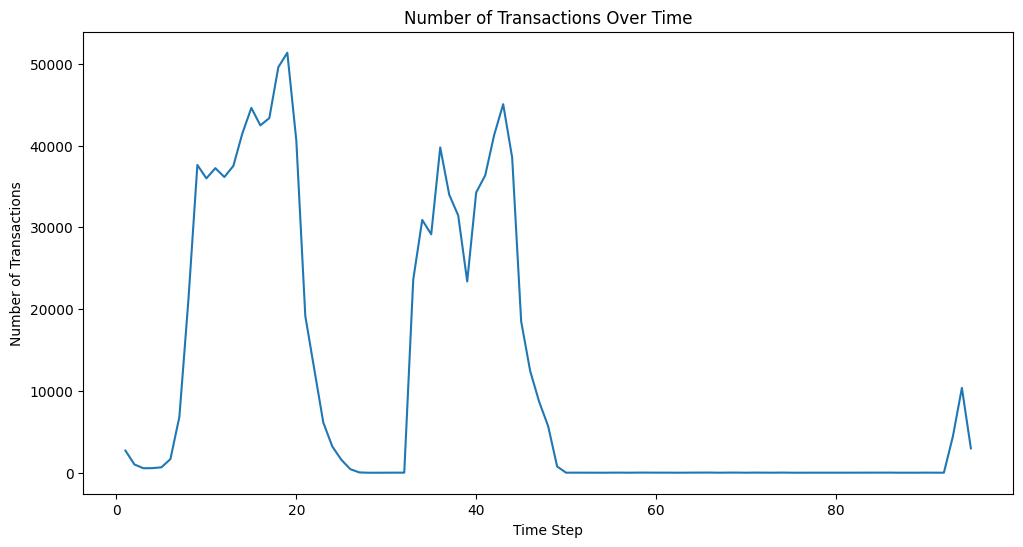

<Figure size 640x480 with 0 Axes>

In [177]:
#plotting  Time Step vs Number of Transactions using the lineplot 
time_step_counts = dataset.groupby('Time_Step').size()

plt.figure(figsize=(12, 6))
sns.lineplot(x=time_step_counts.index, y=time_step_counts.values)
plt.title('Number of Transactions Over Time')
plt.xlabel('Time Step')
plt.ylabel('Number of Transactions')
plt.show()
plt.tight_layout()

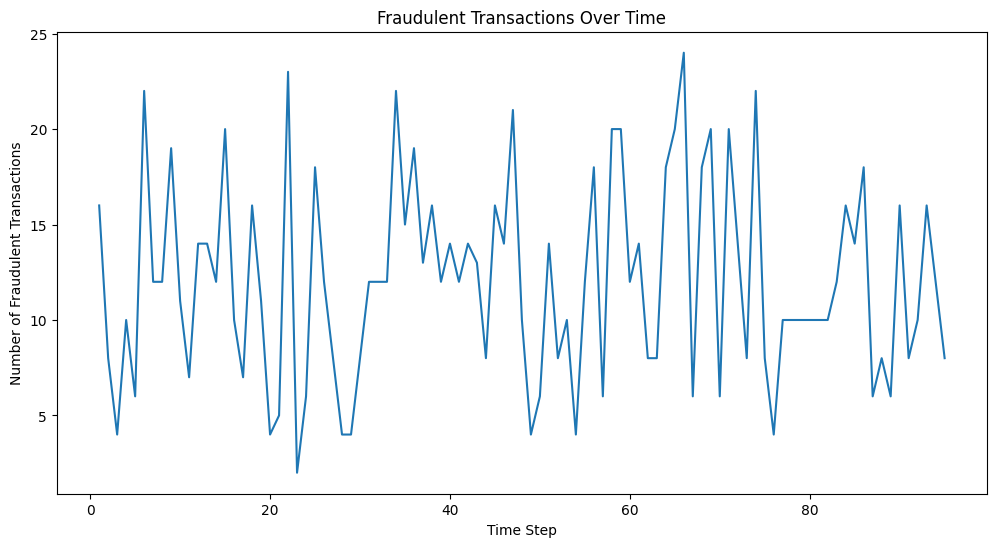

<Figure size 640x480 with 0 Axes>

In [178]:
#plotting Is_Fraud vs Time Sleep vs using the lineplot 
fraud_over_time = dataset[dataset['Is_fraud'] == 1].groupby('Time_Step').size()

plt.figure(figsize=(12, 6))
sns.lineplot(x=fraud_over_time.index, y=fraud_over_time.values)
plt.title('Fraudulent Transactions Over Time')
plt.xlabel('Time Step')
plt.ylabel('Number of Fraudulent Transactions')
plt.show()
plt.tight_layout()

In [179]:
# Dropping columns
dataset = dataset.drop(columns=['Origin_account','Destination_account','Is_flagged_fraud'])

# Check the updated dataset
print(dataset.head())

   Time_Step Transaction_type  Transaction_amount  Origin_old_balance  \
0          1          PAYMENT             9839.64            170136.0   
1          1          PAYMENT             1864.28             21249.0   
2          1         TRANSFER              181.00               181.0   
3          1         CASH_OUT              181.00               181.0   
4          1          PAYMENT            11668.14             41554.0   

   Origin_new_balance  Destination_old_balance  Destination_new_balance  \
0           160296.36                      0.0                      0.0   
1            19384.72                      0.0                      0.0   
2                0.00                      0.0                      0.0   
3                0.00                  21182.0                      0.0   
4            29885.86                      0.0                      0.0   

   Is_fraud  
0         0  
1         0  
2         1  
3         1  
4         0  


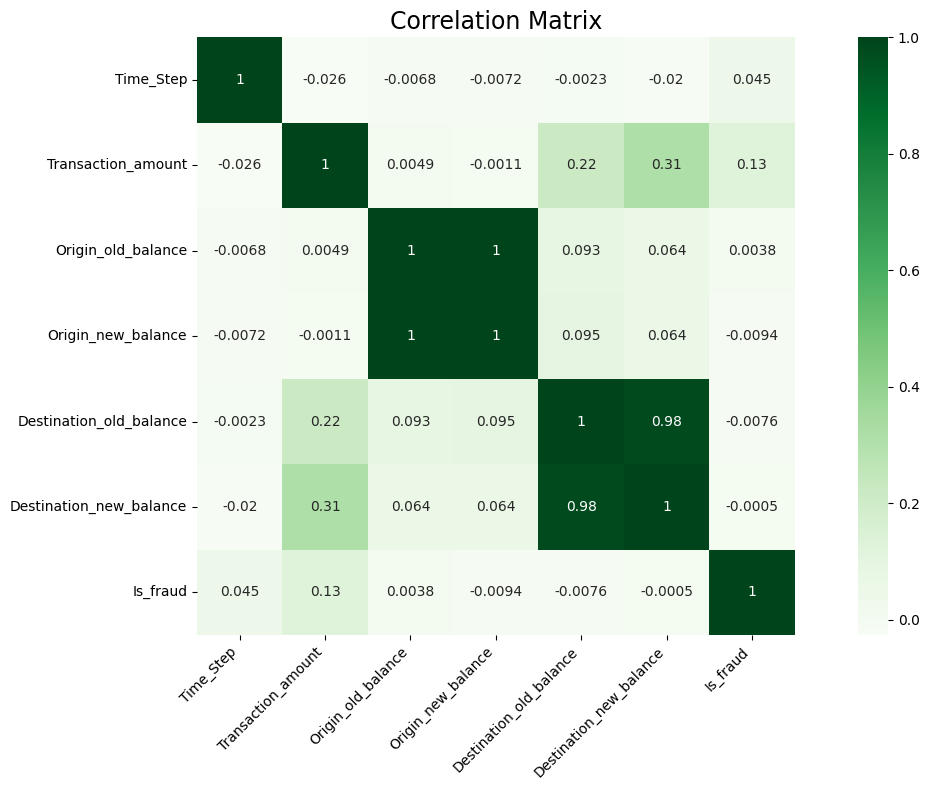

In [180]:
#Ensuring all columns used for correlation are numeric
numeric_dataset = dataset.select_dtypes(include=[np.number])

# Calculate the correlation matrix
corr = numeric_dataset.corr()

# Plot the heatmap
plt.figure(figsize=(13, 8))
sns.heatmap(corr, annot=True, cmap='Greens', square=True) 
plt.title('Correlation Matrix', fontsize=17)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [181]:
dataset
# Maybe you can convert type column values as 0 1 3 

,Time_Step,Transaction_type,Transaction_amount,Origin_old_balance,Origin_new_balance,Destination_old_balance,Destination_new_balance,Is_fraud
0,1,PAYMENT,9839.64,170136.00,160296.36,0.00,0.00,0
1,1,PAYMENT,1864.28,21249.00,19384.72,0.00,0.00,0
2,1,TRANSFER,181.00,181.00,0.00,0.00,0.00,1
3,1,CASH_OUT,181.00,181.00,0.00,21182.00,0.00,1
4,1,PAYMENT,11668.14,41554.00,29885.86,0.00,0.00,0
...,...,...,...,...,...,...,...,...
1048570,95,CASH_OUT,132557.35,479803.00,347245.65,484329.37,616886.72,0
1048571,95,PAYMENT,9917.36,90545.00,80627.64,0.00,0.00,0
1048572,95,PAYMENT,14140.05,20545.00,6404.95,0.00,0.00,0
1048573,95,PAYMENT,10020.05,90605.00,80584.95,0.00,0.00,0


In [182]:
# Define a mapping for the 'Transaction_type' column
type_mapping = {
    'PAYMENT': 0,
    'TRANSFER': 1,
    'CASH_OUT': 2,
    'TRANSFER': 3,
    'DEBIT':4
}

# Apply the mapping to the 'type' column
dataset['Transaction_type'] = dataset['Transaction_type'].map(type_mapping)

# Display the updated DataFrame
print(dataset.head())

   Time_Step  Transaction_type  Transaction_amount  Origin_old_balance  \
0          1               0.0             9839.64            170136.0   
1          1               0.0             1864.28             21249.0   
2          1               3.0              181.00               181.0   
3          1               2.0              181.00               181.0   
4          1               0.0            11668.14             41554.0   

   Origin_new_balance  Destination_old_balance  Destination_new_balance  \
0           160296.36                      0.0                      0.0   
1            19384.72                      0.0                      0.0   
2                0.00                      0.0                      0.0   
3                0.00                  21182.0                      0.0   
4            29885.86                      0.0                      0.0   

   Is_fraud  
0         0  
1         0  
2         1  
3         1  
4         0  


In [183]:
dataset

,Time_Step,Transaction_type,Transaction_amount,Origin_old_balance,Origin_new_balance,Destination_old_balance,Destination_new_balance,Is_fraud
0,1,0.0,9839.64,170136.00,160296.36,0.00,0.00,0
1,1,0.0,1864.28,21249.00,19384.72,0.00,0.00,0
2,1,3.0,181.00,181.00,0.00,0.00,0.00,1
3,1,2.0,181.00,181.00,0.00,21182.00,0.00,1
4,1,0.0,11668.14,41554.00,29885.86,0.00,0.00,0
...,...,...,...,...,...,...,...,...
1048570,95,2.0,132557.35,479803.00,347245.65,484329.37,616886.72,0
1048571,95,0.0,9917.36,90545.00,80627.64,0.00,0.00,0
1048572,95,0.0,14140.05,20545.00,6404.95,0.00,0.00,0
1048573,95,0.0,10020.05,90605.00,80584.95,0.00,0.00,0


In [184]:
#checking tranaction type after renaming values 
dataset['Transaction_type'].value_counts()

Transaction_type
2.0    373641
0.0    353873
3.0     86753
4.0      7178
Name: count, dtype: int64

In [185]:
# building my X and y features for training model
X=dataset.drop(columns=['Is_fraud'],axis=1)
y=dataset[['Is_fraud']]

In [186]:
dataset.columns
# checking the dataset columns 

Index(['Time_Step', 'Transaction_type', 'Transaction_amount',
       'Origin_old_balance', 'Origin_new_balance', 'Destination_old_balance',
       'Destination_new_balance', 'Is_fraud'],
      dtype='object')

In [187]:
X

,Time_Step,Transaction_type,Transaction_amount,Origin_old_balance,Origin_new_balance,Destination_old_balance,Destination_new_balance
0,1,0.0,9839.64,170136.00,160296.36,0.00,0.00
1,1,0.0,1864.28,21249.00,19384.72,0.00,0.00
2,1,3.0,181.00,181.00,0.00,0.00,0.00
3,1,2.0,181.00,181.00,0.00,21182.00,0.00
4,1,0.0,11668.14,41554.00,29885.86,0.00,0.00
...,...,...,...,...,...,...,...
1048570,95,2.0,132557.35,479803.00,347245.65,484329.37,616886.72
1048571,95,0.0,9917.36,90545.00,80627.64,0.00,0.00
1048572,95,0.0,14140.05,20545.00,6404.95,0.00,0.00
1048573,95,0.0,10020.05,90605.00,80584.95,0.00,0.00


In [188]:
y

,Is_fraud
0,0
1,0
2,1
3,1
4,0
...,...
1048570,0
1048571,0
1048572,0
1048573,0


In [189]:
# Splitting the model for training after X and y are identified
# 30% data use for testing, remaining 70% for training
X_training, X_testing, y_training, y_testing = train_test_split(X, y, test_size=0.30, random_state=30)

In [190]:
# Logistic Regression will be used since we have a binary classifications
standard_scaler = StandardScaler()
X_training = standard_scaler.fit_transform(X_training)
X_testing = standard_scaler.transform(X_testing)

In [191]:
# printing our X_training  AND X_testing models
X_training

array([[ 0.70479484,  0.64349527, -0.23913077, ..., -0.29666155,
         2.69572905,  2.54210951],
       [-0.44659946, -1.09864299, -0.55030072, ..., -0.29666155,
        -0.42580538, -0.46087165],
       [ 0.89669389,         nan, -0.25479315, ..., -0.18164583,
        -0.42580538, -0.46087165],
       ...,
       [-0.19073406, -1.09864299, -0.56237025, ..., -0.29666155,
        -0.42580538, -0.46087165],
       [ 1.15255929, -1.09864299, -0.58030283, ..., -0.29087583,
        -0.42580538, -0.46087165],
       [-0.57453217,  0.64349527, -0.03943088, ..., -0.29666155,
        -0.2837199 , -0.26458779]])

In [192]:
X_testing

array([[ 0.83272754,  0.64349527,  1.33869531, ..., -0.29666155,
         0.25758029,  0.40081695],
       [-0.57453217,  0.64349527, -0.39566807, ..., -0.29666155,
         0.91835207,  0.899122  ],
       [-0.63849852, -1.09864299, -0.56565402, ..., -0.08936897,
        -0.42580538, -0.46087165],
       ...,
       [ 1.08859294,         nan, -0.54960385, ..., -0.28870417,
        -0.42580538, -0.46087165],
       [ 1.15255929,  0.64349527, -0.12184184, ..., -0.29666155,
        -0.29133937, -0.28086009],
       [ 1.08859294,  0.64349527, -0.26852333, ..., -0.29666155,
        -0.35596025, -0.35834143]])

In [193]:
# Check for NaN values
print("NaN values in X_training:", np.isnan(X_training).sum())
print("NaN values in X_testing:", np.isnan(X_testing).sum())
print("NaN values in y_training:", np.isnan(y_training).sum())
print("NaN values in y_testing:", np.isnan(y_testing).sum())

NaN values in X_training: 158927
NaN values in X_testing: 68203
NaN values in y_training: Is_fraud    0
dtype: int64
NaN values in y_testing: Is_fraud    0
dtype: int64


In [194]:
from sklearn.impute import SimpleImputer
# Impute NaN values in X_training and X_testing
imputer = SimpleImputer(strategy='mean')  # Use 'median' 
X_training = imputer.fit_transform(X_training)
X_testing = imputer.transform(X_testing)  # Use the same imputer for consistency

# Impute NaN values in y_training and y_testing
y_training = np.nan_to_num(y_training, nan=0)  # Replace NaN with 0
y_testing = np.nan_to_num(y_testing, nan=0)  # Replace NaN with 0

In [195]:
# Verify that NaN values are handled
print("NaN values in X_training after handling:", np.isnan(X_training).sum())
print("NaN values in X_testing after handling:", np.isnan(X_testing).sum())
print("NaN values in y_training after handling:", np.isnan(y_training).sum())
print("NaN values in y_testing after handling:", np.isnan(y_testing).sum())

NaN values in X_training after handling: 0
NaN values in X_testing after handling: 0
NaN values in y_training after handling: 0
NaN values in y_testing after handling: 0


In [196]:
X_training

array([[ 7.04794838e-01,  6.43495267e-01, -2.39130772e-01, ...,
        -2.96661546e-01,  2.69572905e+00,  2.54210951e+00],
       [-4.46599465e-01, -1.09864299e+00, -5.50300721e-01, ...,
        -2.96661546e-01, -4.25805383e-01, -4.60871651e-01],
       [ 8.96693888e-01,  8.04600147e-17, -2.54793150e-01, ...,
        -1.81645833e-01, -4.25805383e-01, -4.60871651e-01],
       ...,
       [-1.90734064e-01, -1.09864299e+00, -5.62370249e-01, ...,
        -2.96661546e-01, -4.25805383e-01, -4.60871651e-01],
       [ 1.15255929e+00, -1.09864299e+00, -5.80302826e-01, ...,
        -2.90875830e-01, -4.25805383e-01, -4.60871651e-01],
       [-5.74532165e-01,  6.43495267e-01, -3.94308765e-02, ...,
        -2.96661546e-01, -2.83719896e-01, -2.64587791e-01]])

In [197]:
y_training

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [198]:
# Check shapes of X_training and y_training
print("Shape of X_training:", X_training.shape)
print("Shape of y_training:", y_training.shape)

Shape of X_training: (734002, 7)
Shape of y_training: (734002, 1)


In [199]:
# Align X_training and y_training to have the same number of samples
min_samples = min(X_training.shape[0], y_training.shape[0])
X_training = X_training[:min_samples]
y_training = y_training[:min_samples]

# Verify shapes after alignment
print("Shape of X_training after alignment:", X_training.shape)
print("Shape of y_training after alignment:", y_training.shape)

Shape of X_training after alignment: (734002, 7)
Shape of y_training after alignment: (734002, 1)


In [200]:
# Initialize and fit the Logistic Regression model
Logistic_p_model = LogisticRegression()
Logistic_p_model.fit(X_training, y_training)

C:\Users\david\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [201]:
# Make predictions on the testing set
y_pred_lr= Logistic_p_model.predict(X_testing)
y_pred_lr

array([0, 0, 0, ..., 0, 0, 0])

In [202]:
accuracy_lr = accuracy_score(y_testing, y_pred_lr)
print("Model Accuracy:", accuracy_lr)

Model Accuracy: 0.9992275242948377


Confusion Matrix:
[[314232     10]
 [   233     98]]


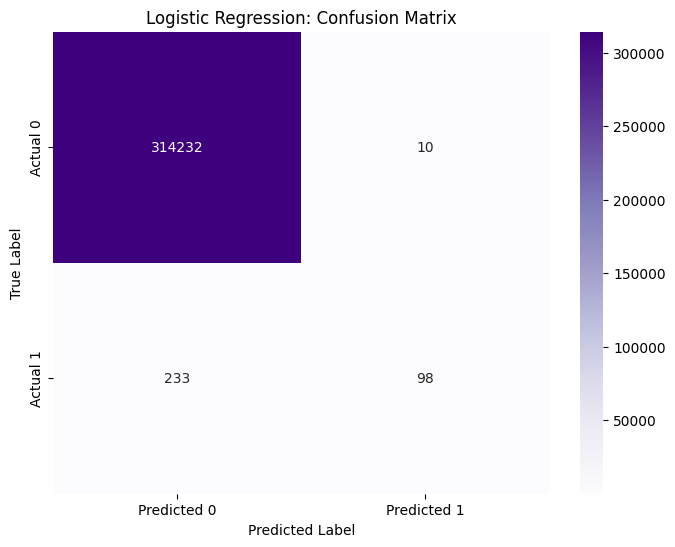

Logistic Regression: Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    314242
           1       0.91      0.30      0.45       331

    accuracy                           1.00    314573
   macro avg       0.95      0.65      0.72    314573
weighted avg       1.00      1.00      1.00    314573

F1 Score:
0.9990314630205896


In [203]:
# Confusion Matrix and Classification Report
conf_matrix = confusion_matrix(y_testing, y_pred_lr)
print("Confusion Matrix:")
print(conf_matrix)

# Plot the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Purples', 
            xticklabels=['Predicted 0', 'Predicted 1'], 
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Logistic Regression: Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout
plt.show()

# Classification Report
class_report = classification_report(y_testing, y_pred_lr)
print("Logistic Regression: Classification Report:")
print(class_report)

f1_lr = f1_score(y_testing, y_pred_lr, average='weighted')
print("F1 Score:")
print(f1_lr)

In [204]:
# Initialize the Decision Tree model
decision_tree_model = DecisionTreeClassifier(random_state=30)
decision_tree_model.fit(X_training, y_training)

# No need to specify the train_test_split again for the Decision since already done it for your Logistic Regression

DecisionTreeClassifier(random_state=30)

In [205]:
# Make predictions on the testing set
y_pred_dtc= Logistic_p_model.predict(X_testing)
y_pred_dtc

array([0, 0, 0, ..., 0, 0, 0])

In [206]:
# Calculate and print the accuracy
accuracy_dtc = accuracy_score(y_testing, y_pred_dtc)
print("Decision Tree Model Accuracy:", accuracy_dtc)

Decision Tree Model Accuracy: 0.9992275242948377


Confusion Matrix:
[[314232     10]
 [   233     98]]


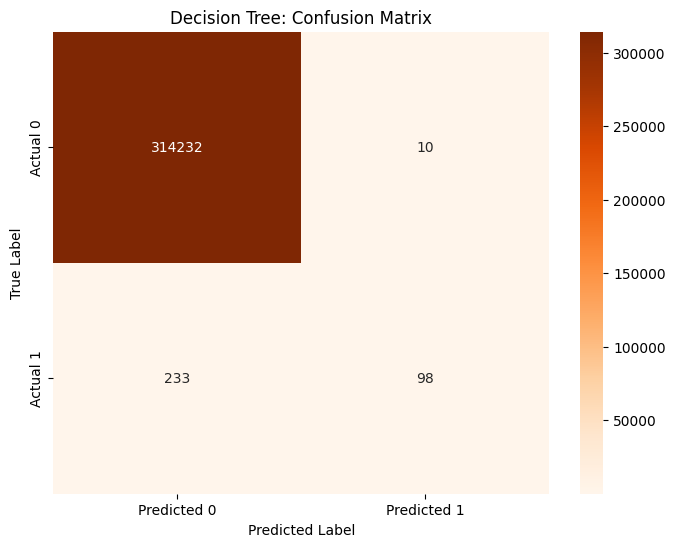

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    314242
           1       0.91      0.30      0.45       331

    accuracy                           1.00    314573
   macro avg       0.95      0.65      0.72    314573
weighted avg       1.00      1.00      1.00    314573

F1 Score:
0.9990314630205896


In [207]:
# Decision Tree: Confusion Matrix
conf_matrix = confusion_matrix(y_testing, y_pred_dtc)
print("Confusion Matrix:")
print(conf_matrix)

# Plot the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Oranges', 
            xticklabels=['Predicted 0', 'Predicted 1'], 
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Decision Tree: Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Classification Report
class_report = classification_report(y_testing, y_pred_dtc)
print("Classification Report:")
print(class_report)

f1_dtc = f1_score(y_testing, y_pred_dtc, average='weighted')
print("F1 Score:")
print(f1_dtc)

In [208]:
# Initialize the Naive Bayes model
naive_bayes_model = GaussianNB()

# Train the model on the training data
naive_bayes_model.fit(X_training, y_training)

C:\Users\david\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [209]:
# Make predictions on the testing set
y_pred_nbm = naive_bayes_model.predict(X_testing)
y_pred_nbm

# Calculate accuracy
accuracy_nbm = accuracy_score(y_testing, y_pred_nbm)
print("Naive Bayes Model Accuracy:", accuracy_nbm)

Naive Bayes Model Accuracy: 0.9800237146862573


Confusion Matrix:
[[308159   6083]
 [   201    130]]


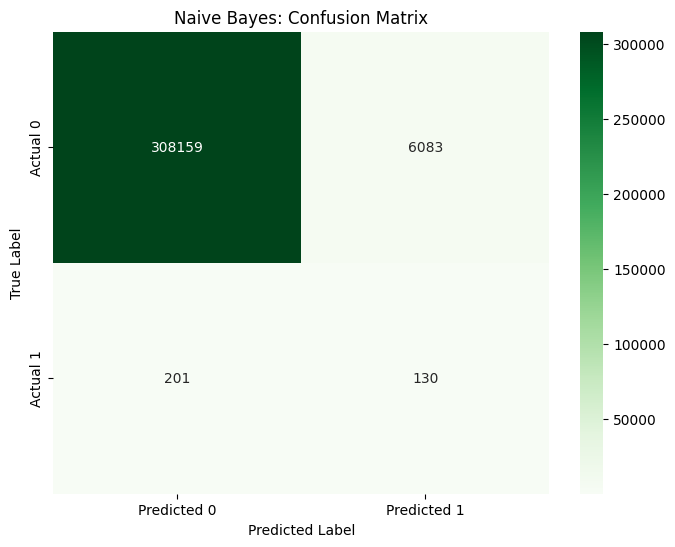

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99    314242
           1       0.02      0.39      0.04       331

    accuracy                           0.98    314573
   macro avg       0.51      0.69      0.51    314573
weighted avg       1.00      0.98      0.99    314573

F1 Score:
0.9889070806982115


In [210]:
# NB Confusion Matrix
conf_matrix = confusion_matrix(y_testing, y_pred_nbm)
print("Confusion Matrix:")
print(conf_matrix)

# Plot the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens', 
            xticklabels=['Predicted 0', 'Predicted 1'], 
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Naive Bayes: Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Classification Report
class_report = classification_report(y_testing, y_pred_nbm)
print("Classification Report:")
print(class_report)

f1_nbm = f1_score(y_testing, y_pred_nbm, average='weighted')
print("F1 Score:")
print(f1_nbm)

In [211]:
scaler = StandardScaler()
X_training_scaled = scaler.fit_transform(X_training)
X_testing_scaled = scaler.transform(X_testing)

In [212]:
# Initialize the KNN (k Nearest Neighbors) model
knn_model = KNeighborsClassifier(n_neighbors=3)  # You can adjust the  k ie number of neighbors, we used 3 neigbours

# Train the model on the scaled training data
knn_model.fit(X_training_scaled, y_training)

C:\Users\david\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=3)

In [213]:
# Make predictions on the scaled testing set
y_pred_knn = knn_model.predict(X_testing_scaled)
y_pred_knn

array([0, 0, 0, ..., 0, 0, 0])

In [214]:
# Calculate accuracy
accuracy_knn = accuracy_score(y_testing, y_pred_knn)
print("KNN (K Nearest Neighbors) Model Accuracy:", accuracy_knn)

KNN (K Nearest Neighbors) Model Accuracy: 0.9995199842325947


Confusion Matrix for KNN:
[[314227     15]
 [   136    195]]


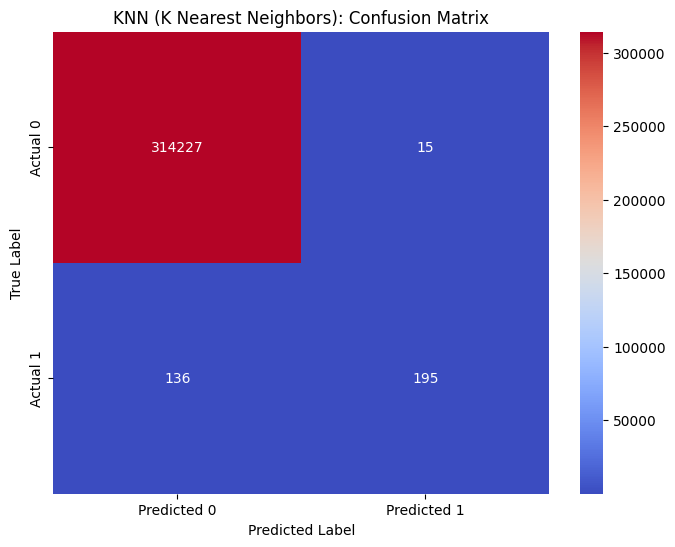

Classification Report for KNN (K Nearest Neighbors)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    314242
           1       0.93      0.59      0.72       331

    accuracy                           1.00    314573
   macro avg       0.96      0.79      0.86    314573
weighted avg       1.00      1.00      1.00    314573

F1 Score:
0.9994663502949942


In [215]:
# KNN Confusion Matrix
conf_matrix_knn = confusion_matrix(y_testing, y_pred_knn)
print("Confusion Matrix for KNN:")
print(conf_matrix_knn)
            
# Plot the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='coolwarm', 
            xticklabels=['Predicted 0', 'Predicted 1'], 
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('KNN (K Nearest Neighbors): Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Classification Report
class_report_knn = classification_report(y_testing, y_pred_knn)
print("Classification Report for KNN (K Nearest Neighbors)")
print(class_report_knn)

f1_knn = f1_score(y_testing, y_pred_knn, average='weighted')
print("F1 Score:")
print(f1_knn)

In [ ]:
# Initialize the SVM (Support Vector) model
svm_model = SVC(kernel='linear', random_state=30)  # You can adjust the kernel as needed

# Fit the model with training data
svm_model.fit(X_training, y_training)

C:\Users\david\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
# Make predictions on the testing set
y_pred_svm = svm_model.predict(X_testing)
y_pred_svm

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
# Putting testing results in a data frame
pd.DataFrame({'Actual': y_testing, 'Predicted': y_pred_dtc})

,Actual,Predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
314568,0,0
314569,0,0
314570,0,0
314571,0,0


In [ ]:
# Calculate accuracy
accuracy_svm = accuracy_score(y_testing, y_pred_knn)
print("SVM (Support Vector) Model Accuracy:", accuracy_svm)

SVM (Support Vector) Model Accuracy: 0.9995199842325947


Confusion Matrix for SVM:
[[314227     15]
 [   136    195]]


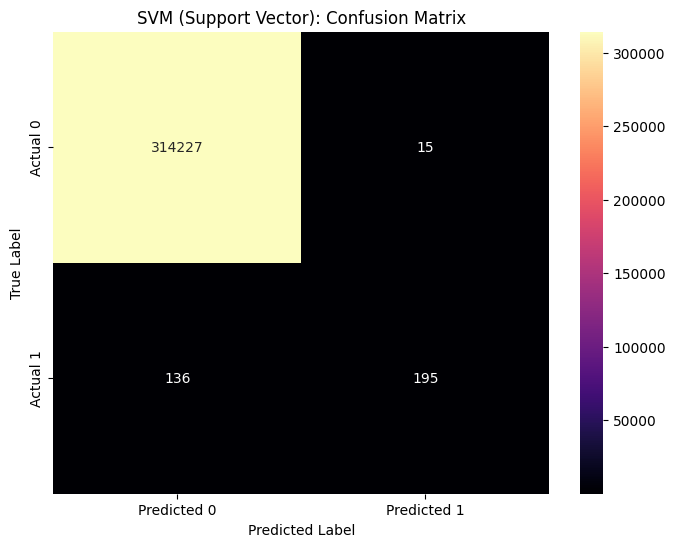

SVM (Support Vector): Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    314242
           1       0.93      0.59      0.72       331

    accuracy                           1.00    314573
   macro avg       0.96      0.79      0.86    314573
weighted avg       1.00      1.00      1.00    314573

F1 Score:
0.9989420132570787


In [ ]:
# KNN Confusion Matrix
conf_matrix_svm = confusion_matrix(y_testing, y_pred_knn)
print("Confusion Matrix for SVM:")
print(conf_matrix_knn)
            
# Plot the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='magma', 
            xticklabels=['Predicted 0', 'Predicted 1'], 
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('SVM (Support Vector): Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Classification Report
class_report_knn = classification_report(y_testing, y_pred_knn)
print("SVM (Support Vector): Classification Report")
print(class_report_knn)

f1_svm = f1_score(y_testing, y_pred_svm, average='weighted')
print("F1 Score:")
print(f1_svm)

In [ ]:
# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=30)

# Train the model on the scaled training data
rf_model.fit(X_training_scaled, y_training)

C:\Users\david\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(random_state=30)

In [ ]:
# Make predictions on the scaled testing set
y_pred_rf = rf_model.predict(X_testing_scaled)
y_pred_rf

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
# Putting testing results in a data frame
# Putting testing results in a data frame
pd.DataFrame({'Actual': y_testing, 'Predicted': y_pred_dtc}) # remember  to put in a dictionary 

,Actual,Predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
314568,0,0
314569,0,0
314570,0,0
314571,0,0


In [ ]:
# Check the shapes of y_testing and y_pred_rf
print("Shape of y_testing:", y_testing.shape)
print("Shape of y_pred_rt:", y_pred_rf.shape)

# Flatten the arrays if they are not 1-dimensional
y_testing = y_testing.flatten()  # or y_testing.ravel()
y_pred_rt = y_pred_rf.flatten()  # or y_pred_rt.ravel()

# Create a DataFrame to display actual and predicted values
results_df = pd.DataFrame({'Actual': y_testing,'Predicted': y_pred_rf})

# Display the entire DataFrame
print(results_df)

Shape of y_testing: (314573, 1)
Shape of y_pred_rt: (314573,)
        Actual  Predicted
0            0          0
1            0          0
2            0          0
3            0          0
4            0          0
...        ...        ...
314568       0          0
314569       0          0
314570       0          0
314571       0          0
314572       0          0

[314573 rows x 2 columns]


In [ ]:
# Calculate accuracy score
accuracy_rf = accuracy_score(y_testing, y_pred_rf)
print("Random Forest Model Accuracy:", accuracy_rf)

Random Forest Model Accuracy: 0.9997901917837831


Confusion Matrix for Random Forest:
[[314238      4]
 [    62    269]]


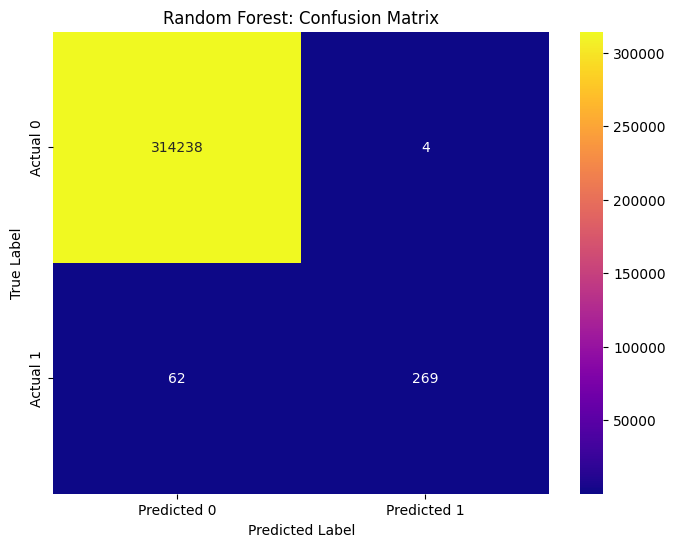

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    314242
           1       0.99      0.81      0.89       331

    accuracy                           1.00    314573
   macro avg       0.99      0.91      0.95    314573
weighted avg       1.00      1.00      1.00    314573

F1 Score for Random Forest:
0.9997801278907292


In [ ]:
# Confusion Matrix
conf_matrix_rf = confusion_matrix(y_testing, y_pred_rf)
print("Confusion Matrix for Random Forest:")
print(conf_matrix_rf)

# Plot the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='plasma',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Random Forest: Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Classification Report
class_report_rf = classification_report(y_testing, y_pred_rf)
print("Classification Report for Random Forest:")
print(class_report_rf)

# F1 Score
f1_rf = f1_score(y_testing, y_pred_rf, average='weighted')
print("F1 Score for Random Forest:")
print(f1_rf)


In [ ]:
# Initialize the Gradient Boosting model
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=30)

# Train the model on the scaled training data
gb_model.fit(X_training_scaled, y_training)

C:\Users\david\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\preprocessing\_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier(random_state=30)

In [ ]:
# Make predictions on the scaled testing set
y_pred_gb = gb_model.predict(X_testing_scaled)
y_pred_gb

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
# Putting testing results in a data frame
pd.DataFrame({'Actual': y_testing, 'Predicted': y_pred_dtc}) # remember  to put in a dictionary 

,Actual,Predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
314568,0,0
314569,0,0
314570,0,0
314571,0,0


In [ ]:
# Calculate accuracy
accuracy_gb = accuracy_score(y_testing, y_pred_gb)
print("Gradient Boosting Model Accuracy:", accuracy_gb)

Gradient Boosting Model Accuracy: 0.9989350643570809


Confusion Matrix for Gradient Boosting:
[[314132    110]
 [   225    106]]


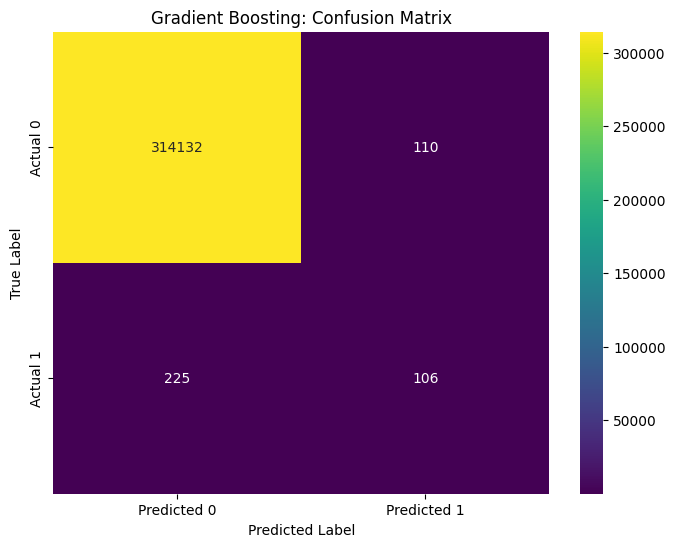

Classification Report for Gradient Boosting:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    314242
           1       0.49      0.32      0.39       331

    accuracy                           1.00    314573
   macro avg       0.75      0.66      0.69    314573
weighted avg       1.00      1.00      1.00    314573

F1 Score for Gradient Boosting:
0.9988232169814268


In [ ]:
# Confusion Matrix
conf_matrix_gb = confusion_matrix(y_testing, y_pred_gb)
print("Confusion Matrix for Gradient Boosting:")
print(conf_matrix_gb)

# Plot the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_gb, annot=True, fmt='d', cmap='viridis',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Gradient Boosting: Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Classification Report
class_report_gb = classification_report(y_testing, y_pred_gb)
print("Classification Report for Gradient Boosting:")
print(class_report_gb)

# F1 Score
f1_gb = f1_score(y_testing, y_pred_gb, average='weighted')
print("F1 Score for Gradient Boosting:")
print(f1_gb)


In [ ]:
# printing models accuracy scores 
print(accuracy_lr)
print(accuracy_dtc)
print(accuracy_nbm)
print(accuracy_knn)
print(accuracy_svm)
print(accuracy_rf)
print(accuracy_gb)

0.9992275242948377
0.9992275242948377
0.9800237146862573
0.9995199842325947
0.9995199842325947
0.9997901917837831
0.9989350643570809


In [ ]:
# printing models F1 Scores scores 
print(f1_lr)
print(f1_dtc)
print(f1_nbm)
print(f1_knn)
print(f1_svm)
print(f1_rf)
print(f1_gb)

0.9990314630205896
0.9990314630205896
0.9889070806982115
0.9994663502949942
0.9989420132570787
0.9997801278907292
0.9988232169814268


                 Model  Accuracy  F1 Score
0  Logistic Regression  0.999228  0.999803
1       Decision Trees  0.999228  0.999803
2          Naive Bayes  0.980024  0.998907
3                  KNN  0.999520  0.999467
4                  SVM  0.999520  0.999842
5        Random Forest  0.999790  0.999780
6    Gradient Boosting  0.998935  0.998823


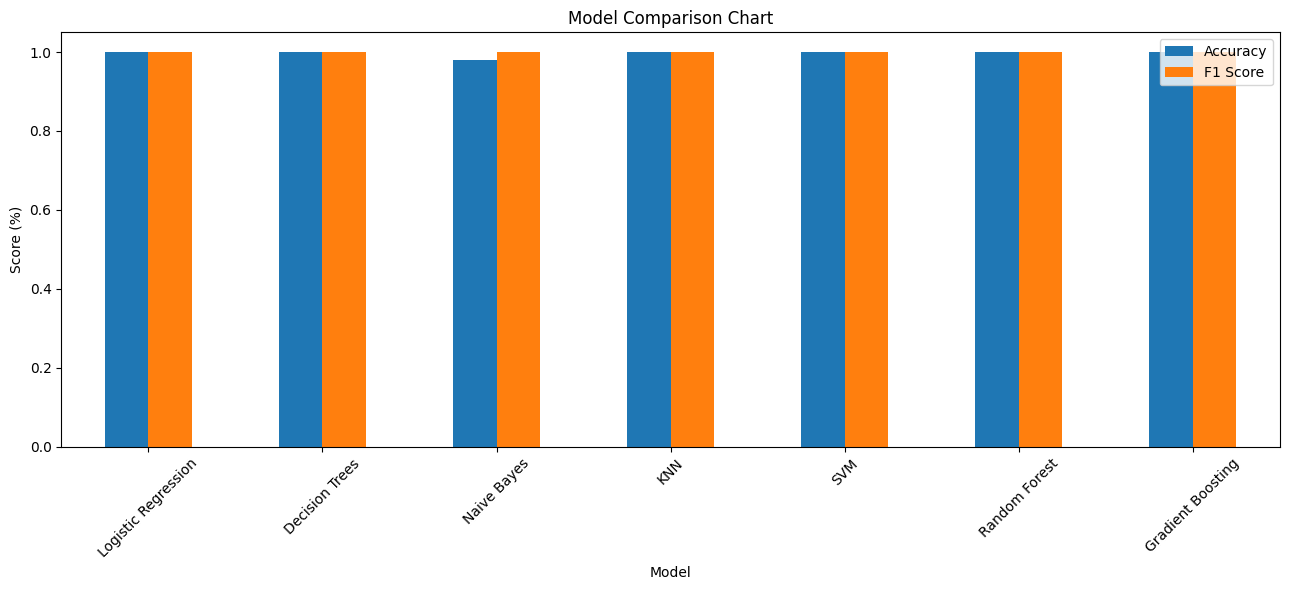

In [ ]:
# Data for the comparison chart
data = {
    'Model': ['Logistic Regression', 'Decision Trees', 'Naive Bayes', 'KNN', 'SVM', 'Random Forest', 'Gradient Boosting'],
    'Accuracy': [0.9992275242948377, 0.9992275242948377, 0.9800237146862573, 0.9995199842325947, 0.9995199842325947, 0.9997901917837831, 0.9989350643570809],
    'F1 Score': [0.9998031463025896, 0.9998031463025896, 0.9989070806982115, 0.9994665302949942, 0.9998420132570787, 0.9997801278907292, 0.9988232169814268]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Display the DataFrame
print(df)

# Plot the comparison chart
df.set_index('Model').plot(kind='bar', figsize=(13, 6))
plt.title('Model Comparison Chart')
plt.ylabel('Score (%)')
plt.xlabel('Model')
plt.xticks(rotation=45)
plt.tight_layout()
